# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer



%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [70]:
data = load_boston() # load dataset

X = data.data
y = data.target
columns = data.feature_names

c:\users\yanal\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

## Linear regression

#### 1. [0.5 points] 
Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [71]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df.Target, \
                                                    test_size=0.2, random_state=0)
#train = df.sample(frac=0.8, random_state=0)
#X_train = train.loc[:, train.columns != 'target']
#y_train = train['target']
#
#test=df.drop(train.index)
#X_test = test.loc[:, test.columns != 'target']
#y_test = test['target']

---
#### 2. [1 point] 
Train models on train data using StatsModels( or sckit-learn) library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [72]:
# define standard scaler
scaler = StandardScaler()
# transform data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

# LinearRegression:

In [73]:
linReg = LinearRegression().fit(X_train_scaled, y_train)
linReg_score = linReg.score(X_train_scaled, y_train)
print("LinearRegression score = %.4f" % linReg_score)

LinearRegression score = 0.7730


In [74]:
linReg_y_test_predictedValues = linReg.predict(X_test_scaled)
linReg_y_train_predictedValues = linReg.predict(X_train_scaled)

In [75]:
print("Train RMSE = %.4f" % mean_squared_error(y_train, linReg_y_train_predictedValues, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, linReg_y_test_predictedValues, squared=False))

Train RMSE = 4.3962
Test RMSE = 5.9259


In [76]:
print("Train r2_score = %.4f" % r2_score(y_train, linReg_y_train_predictedValues))
print("Test r2_score = %.4f" % r2_score(y_test, linReg_y_test_predictedValues))

Train r2_score = 0.7730
Test r2_score = 0.5687


# Ridge with  α=0.01:

In [77]:
rdg = Ridge(alpha=0.01).fit(X_train_scaled, y_train)
rdg_score = rdg.score(X_train_scaled, y_train)
print("Ridge(alpha:0.01) score = %.4f" % rdg_score)

Ridge(alpha:0.01) score = 0.7730


In [78]:
rdg_y_train_predictedValues = rdg.predict(X_train_scaled)
rdg_y_test_predictedValues = rdg.predict(X_test_scaled)

In [79]:
print("Train RMSE = %.4f" % mean_squared_error(y_train, rdg_y_train_predictedValues, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, rdg_y_test_predictedValues, squared=False))

Train RMSE = 4.3962
Test RMSE = 5.9260


In [80]:
print("Train r2_score = %.4f" % r2_score(y_train, rdg_y_train_predictedValues))
print("Test r2_score = %.4f" % r2_score(y_test, rdg_y_test_predictedValues))

Train r2_score = 0.7730
Test r2_score = 0.5687


# Lasso with α=0.01:

In [81]:
lso = Lasso(alpha=0.01).fit(X_train_scaled, y_train)
lso_score = lso.score(X_train_scaled, y_train)
print("Lasso(alpha:0.01) score = %.4f" % lso_score)

Lasso(alpha:0.01) score = 0.7730


In [82]:
lso_y_train_predictedValues = lso.predict(X_train_scaled)
lso_y_test_predictedValues = lso.predict(X_test_scaled)

In [83]:
print("Train RMSE = %.4f" % mean_squared_error(y_train, lso_y_train_predictedValues, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, lso_y_test_predictedValues, squared=False))

Train RMSE = 4.3967
Test RMSE = 5.9369


In [84]:
print("Train r2_score = %.4f" % r2_score(y_train, lso_y_train_predictedValues))
print("Test r2_score = %.4f" % r2_score(y_test, lso_y_test_predictedValues))

Train r2_score = 0.7730
Test r2_score = 0.5671


---
#### 3. [1 point] 
Explore the values of the parameters of the resulting models and compare the number of zero weights in them. 

Comment on the significance of the coefficients, overal model significance and other related factors from the results table. 

`Hint` Use StatModels to obtain significance of the coefficients. They ca be found on the `summary` of the fitted linear model. 
It might be tricky to obtain `summary` for the regularized model. Please, read the documentation of the StatModels library to figure out how to do that, e.g.   [OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults) class might be useful here.

In [85]:
linReg.coef_, linReg.intercept_

(array([-0.97082019,  1.05714873,  0.03831099,  0.59450642, -1.8551476 ,
         2.57321942, -0.08761547, -2.88094259,  2.11224542, -1.87533131,
        -2.29276735,  0.71817947, -3.59245482]),
 22.611881188118804)

In [86]:
XX = df.loc[:, df.columns != 'Target']
YY = df['Target']
XX = sm.add_constant(XX)
model = sm.OLS(YY, XX) 

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          6.72e-135
Time:                        13:56:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [87]:
results.params

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

**It's clear that no zero weights, but we can see that Age almost has a zero weight and if we look to the p-value of it we can see how large it is.**

# Conclusions:
At first by looking to the weights we can see the effect of each feature on our model, for example: `NOX` feature has the greatest effect while Age almost has no effect.
Then if we look at p-value column of features we also can sellect the features with high value close to one, and prepare ourself to remove those features from our moddel in order to improve it.
We can also look to the R-squared and notice that, the independent features explain `74.1%` of the variation in the target variable

---
#### 4. [1 point] 
Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions. 
It's enough to apply to one of the models above (e.g simple linear regression)

# Elimination by P-value:
We want to find out if the features do indeed affect the house prices.

H0: Feature does not affect house prices.</br>
H1: Feature affects house prices.</br>

So, if a feature shows p-value <=`0.01` then we reject the null hypothesis and say that ‘feature affects house prices.‘

We don’t have to actually recalculate p-values for each feature. We can simply get them from previous task(task 3) where we used OLS from statsmodels.api which basically helps to fit linear regression model and also lets us know what the p-values are.

In [88]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          6.72e-135
Time:                        13:57:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

As we can see ,</br>
R-squared: `0.741`</br>
Adj. R-squared: `0.734`<br>

We also have p-values >`0.05`(Generally, this is the significance level that is used in most business scenarios) for features AGE, INDUS. We will remove these features one by one and check the difference in the metrics of the model.

In [89]:
XX.drop('AGE',axis=1, inplace=True)
model = sm.OLS(YY,XX)
results_1 = model.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          6.08e-136
Time:                        13:57:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4369      5.080      7.172      0.0

In [90]:
XX.drop('INDUS',axis=1, inplace=True)
model = sm.OLS(YY,XX)
results_2 = model.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          5.54e-137
Time:                        13:57:10   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

---
As we can see ,</br>
R-squared: `0.741`</br>
Adj. R-squared: `0.735`<br>

R-squared remains the same but Adj. R-squared increased. That is because, Adj.R-squared takes the number of features into consideration, whereas R-squared does not. So it’s always good to look at Adj. R-squared while removing/adding features. In this case, removal of INDUS has improved the model since Adj. R-squared increased and moved closer towards R-squared.

# conclusions:
I actually added explanation after every step but I can add this:<br>
We can notice that before removing features, the independent features explain `74.1%` of the variation in the target variable.
After removing it remained the same, that means the total square of the distance of actual points from the regression line (RSS) didn't change, it would mean that the regression line didn't get closer to the actual points. While Adj. R-squared increased (that means the model has improved) by 0.001 and as I mentioned above, that is because, Adj.R-squared takes the number of features into consideration

---
#### 5. [1 point] 
Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

Best alpha = 1000.0000


Text(0, 0.5, 'CV score')

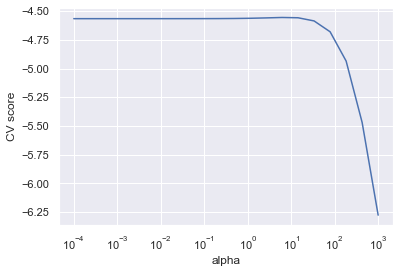

In [91]:
# This pice of code was taken from seminar 4, then the scoring was modified to RMSE by make_scorer(
# source: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

alphas = np.logspace(-4, 3, 20)
RMSE = make_scorer(mean_squared_error, squared=False)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring=RMSE, cv=5)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

---
## Gradient descent

#### 6. [3.5 points] 
**Implement a linear regression model for the MSE loss function, trained by gradient descent.**

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} q_{i_{k}} (w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

Exponentially weighed averages can provide a better estimate which is closer to the actual gradient.


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [92]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum'
        delta: float
            proportion of object in a batch (fot stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        """
        
        self.gd_type = gd_type
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        if w0 is None:
            self.w0 = np.zeros(X.shape[1]+1)
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.h = None
        self.h0 = 0
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        XX = X.copy()
        XX['ones'] = 1
        self.loss_history = []
        self.w = [self.w0.copy()]
        self.h = [self.h0]
        for i in range(self.max_iter):
            step = self.eta * self.calc_gradient(XX, y)
            self.w0 -= step
            self.w.append(self.w0.copy())
            if self.gd_type == 'Momentum':
                self.h0 = step
                self.h.append(self.h0.copy())
            
            J = self.calc_loss(XX, y)
            self.loss_history.append(J.copy()) 
            if np.linalg.norm(self.w[-1] - self.w[-2]) < self.tolerance:
                break
                     
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        if 'ones' not in df.columns:
            XX = X.copy()
            XX['ones'] = 1
            return np.dot(XX, self.w0.T)
        return np.dot(X, self.w0.T)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        
        if self.gd_type == 'GradientDescent':
            return 2 * np.dot(X.T, np.dot(X, self.w0) - y) / y.shape[0]
        elif self.gd_type == 'StochasticDescent':
            return self.__calc_grad_on_batch(X, y, self.w0, 20)
        elif self.gd_type == 'Momentum':
            return self.alpha * self.h0 + 2 * self.__calc_grad_on_batch(X, y, self.w0, 20)
        else:
            raise ValueError("gd_type not supported.")
            
    def __calc_grad_on_batch(self, X, Y, w, batch_size):
        
        sample = np.random.randint(X.shape[0], size=batch_size)
        return 2 * np.dot(X.iloc[sample].T, np.dot(X.iloc[sample], w.T) - Y.iloc[sample]) / batch_size

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        
        y_pred = self.predict(X)
        return np.sum((y - y_pred)**2)

#### 7. [1 points] 
Train and validate "hand-written" model (simple linear regression) on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

# From task 2 LinearRegression:

In [93]:
print("Train RMSE = %.4f" % mean_squared_error(y_train, linReg_y_train_predictedValues, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, linReg_y_test_predictedValues, squared=False))

Train RMSE = 4.3962
Test RMSE = 5.9259


In [94]:
print("Train r2_score = %.4f" % r2_score(y_train, linReg_y_train_predictedValues))
print("Test r2_score = %.4f" % r2_score(y_test, linReg_y_test_predictedValues))

Train r2_score = 0.7730
Test r2_score = 0.5687


---
# GradientDescent:

In [95]:
my_model_GradientDescent = LinReg(gd_type = 'GradientDescent', max_iter=2845)
my_model_GradientDescent.fit(X_train_scaled, y_train)

LinReg(gd_type='GradientDescent', max_iter=2845,
       w0=array([-9.67103184e-01,  1.05077574e+00,  1.72827330e-02,  5.97375830e-01,
       -1.84935163e+00,  2.57692650e+00, -9.07334295e-02, -2.88077508e+00,
        2.06262984e+00, -1.81951509e+00, -2.29055617e+00,  7.17173996e-01,
       -3.59076538e+00,  2.26118812e+01]))

In [96]:
my_model_GradientDescent.loss_history[-1]

7808.052216996006

In [97]:
print('weights:', my_model_GradientDescent.w[-1])

weights: [-9.67103184e-01  1.05077574e+00  1.72827330e-02  5.97375830e-01
 -1.84935163e+00  2.57692650e+00 -9.07334295e-02 -2.88077508e+00
  2.06262984e+00 -1.81951509e+00 -2.29055617e+00  7.17173996e-01
 -3.59076538e+00  2.26118812e+01]


In [98]:
my_model_GradientDescent_y_test_predictedValues = my_model_GradientDescent.predict(X_test_scaled)
my_model_GradientDescent_y_train_predictedValues = my_model_GradientDescent.predict(X_train_scaled)

In [99]:
print("Train RMSE = %.4f" % mean_squared_error(y_train, my_model_GradientDescent_y_train_predictedValues, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, my_model_GradientDescent_y_test_predictedValues, squared=False))

Train RMSE = 4.3962
Test RMSE = 5.9280


In [100]:
print("Train r2_score = %.4f" % r2_score(y_train, my_model_GradientDescent_y_train_predictedValues))
print("Test r2_score = %.4f" % r2_score(y_test, my_model_GradientDescent_y_test_predictedValues))

Train r2_score = 0.7730
Test r2_score = 0.5684


# StochasticDescent:

In [101]:
my_model_StochasticDescent = LinReg(gd_type = 'StochasticDescent', max_iter=1500)
my_model_StochasticDescent.fit(X_train_scaled, y_train)

LinReg(gd_type='StochasticDescent', max_iter=1500,
       w0=array([-0.93909202,  0.96541676, -0.1989411 ,  0.6006661 , -1.80227233,
        2.45784498, -0.12355171, -2.8123679 ,  1.91792115, -1.67363128,
       -2.24736267,  0.57902517, -3.50459626, 22.58387714]))

In [102]:
my_model_StochasticDescent.loss_history[-1]

7835.424717685679

In [103]:
print('weights:', my_model_StochasticDescent.w[-1])

weights: [-0.93909202  0.96541676 -0.1989411   0.6006661  -1.80227233  2.45784498
 -0.12355171 -2.8123679   1.91792115 -1.67363128 -2.24736267  0.57902517
 -3.50459626 22.58387714]


In [104]:
my_model_StochasticDescent_y_test_predictedValues = my_model_StochasticDescent.predict(X_test_scaled)
my_model_StochasticDescent_y_train_predictedValues = my_model_StochasticDescent.predict(X_train_scaled)

In [105]:
print("Train RMSE = %.4f" % mean_squared_error(y_train, my_model_StochasticDescent_y_train_predictedValues, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, my_model_StochasticDescent_y_test_predictedValues, squared=False))

Train RMSE = 4.4039
Test RMSE = 5.9603


In [106]:
print("Train r2_score = %.4f" % r2_score(y_train, my_model_StochasticDescent_y_train_predictedValues))
print("Test r2_score = %.4f" % r2_score(y_test, my_model_StochasticDescent_y_test_predictedValues))

Train r2_score = 0.7722
Test r2_score = 0.5637


# Momentum:

In [107]:
my_model_Momentum = LinReg(max_iter=1000, alpha = 1e-1)
my_model_Momentum.fit(X_train_scaled, y_train)

LinReg(alpha=0.1,
       w0=array([-1.1476627 ,  1.09073642, -0.21534248,  0.64634554, -1.95822548,
        2.53110166, -0.64062215, -2.83421457,  1.85178443, -1.9436567 ,
       -1.95875679,  0.69373953, -3.46593702, 22.57184024]))

In [108]:
my_model_Momentum.loss_history[-1]

8231.197831653413

In [109]:
print('weights:', my_model_Momentum.w[-1])

weights: [-1.1476627   1.09073642 -0.21534248  0.64634554 -1.95822548  2.53110166
 -0.64062215 -2.83421457  1.85178443 -1.9436567  -1.95875679  0.69373953
 -3.46593702 22.57184024]


In [110]:
my_model_Momentum_y_test_predictedValues = my_model_Momentum.predict(X_test_scaled)
my_model_Momentum_y_train_predictedValues = my_model_Momentum.predict(X_train_scaled)

In [111]:
print("Train RMSE = %.4f" % mean_squared_error(y_train, my_model_Momentum_y_train_predictedValues, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, my_model_Momentum_y_test_predictedValues, squared=False))

Train RMSE = 4.5138
Test RMSE = 6.2558


In [112]:
print("Train r2_score = %.4f" % r2_score(y_train, my_model_Momentum_y_train_predictedValues))
print("Test r2_score = %.4f" % r2_score(y_test, my_model_Momentum_y_test_predictedValues))

Train r2_score = 0.7607
Test r2_score = 0.5194


# Conclusions:
Well, `hand-written` model gives us very good results and very reasonable weights, which were closed to the results which we got in task2 by sklearn.linear_model.LinearRegression.
As we can see from the implementation of LinReg model there is three ways to get the weights(`GradientDescent`, `StochasticDescent`, `Momentum`):

**GradientDescent**<br>
Takes longer time then others(because we have to run through ALL the samples in our training set to do a single update for the weights) and it gives the same results by giving the same data.

**StochasticDescent**<br>
As you can see, the stochastic gradient method "wanders" around the optimum. This is explained by the selection of the gradient descent step $\eta_k$. The point is that for the convergence of stochastic gradient descent for the sequence of steps 
$\eta_k$ , the [Robbins-Monroe conditions](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729586) must be satisfied:
$$
\sum_{k = 1}^\infty \eta_k = \infty, \qquad \sum_{k = 1}^\infty \eta_k^2 < \infty.
$$

Takes less time than GD(because we use SUBSET of training sample from our training set to do a single update for the weights)
and because of that it gives different results by giving the same data.

**Momentum**<br>
The idea of momentum-based optimizers is to remember the previous gradients from recent optimization steps and to use them to help to do a better job of choosing the direction to move next, acting less like a drunk student walking downhill and more like a rolling ball

---
#### 8. [1 points] 
Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

In [113]:
import plotly.graph_objects as go


def compute_limits(w_list):
    dx = np.max(np.abs(w_list[:, 0] - w_true[0])) * 1.1
    dy = np.max(np.abs(w_list[:, 1] - w_true[1])) * 1.1
    
    return (w_true[0] - dx, w_true[0] + dx), (w_true[1] - dy, w_true[1] + dy)


def compute_levels(w_list, x_range, y_range, num: int = 100):
    x, y = np.linspace(x_range[0], x_range[1], num), np.linspace(y_range[0], y_range[1], num)
    A, B = np.meshgrid(x, y)

    levels = np.empty_like(A)

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))
            
    return x, y, levels


def make_contour(x, y, levels, name: str=None):
    return go.Contour(
        x=x,
        y=y,
        z=levels,
        contours_coloring='lines',
        line_smoothing=1,
        line_width=2,
        ncontours=100,
        opacity=0.5,
        name=name
    )


def make_arrow(figure, x, y):
    x, dx = x
    y, dy = y
    
    figure.add_annotation(
        x=x,
        y=y,
        ax=x + dx,
        ay=y + dy,
        xref='x',
        yref='y',
        text='',
        showarrow=True,
        axref = 'x',
        ayref='y',
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
    )


def plot_trajectory(w_list, name):
    # compute limits
    x_range, y_range = compute_limits(w_list)
    
    # compute level set
    x, y, levels = compute_levels(w_list, x_range, y_range)
    
    # plot levels
    contour = make_contour(x, y, levels, 'Loss function levels')

    # plot weights
    w_path = go.Scatter(
        x=w_list[:, 0][:-1],
        y=w_list[:, 1][:-1],
        mode='lines+markers',
        name='W',
        marker=dict(size=7, color='red')
    )

    # plot final weight
    w_final = go.Scatter(
        x=[w_list[:, 0][-1]],
        y=[w_list[:, 1][-1]],
        mode='markers',
        name='W_final',
        marker=dict(size=10, color='black'),
    )
    
    # plot true optimum    
    w_true_point = go.Scatter(
        x=[w_true[0]],
        y=[w_true[1]],
        mode='markers',
        name='W_true',
        marker=dict(size=10, color='black'),
        marker_symbol='star'
    )
    
    # make the figure
    fig = go.Figure(data=[contour, w_path, w_final, w_true_point])

    fig.update_xaxes(type='linear', range=x_range)
    fig.update_yaxes(type='linear', range=y_range)

    fig.update_layout(title=name)

    fig.update_layout(
        autosize=True,
        width=700,
        margin=dict(
            l=50,
            r=50,
            b=50,
            t=100,
            pad=4
        ),
        paper_bgcolor='LightSteelBlue',
    )

    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))

    fig.update_traces(showlegend=True)

    fig.show()

In [114]:
full_gd = go.Scatter(x=np.arange(1000), y=my_model_GradientDescent.loss_history[:1000], name='Full GD')
sgd = go.Scatter(x=np.arange(1000), y=my_model_StochasticDescent.loss_history[:1000], name='SGD')
momentum = go.Scatter(x=np.arange(1000), y=my_model_Momentum.loss_history, name='Momentum')

fig = go.Figure(data=[full_gd, sgd, momentum])

fig.update_xaxes(type='linear', range=[-1, 1000 + 1])
fig.update_yaxes(type='linear')

fig.update_layout(title = 'Loss history', xaxis=dict(title="Iteration"))

fig.update_layout(
    autosize=True,
    width=700,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    paper_bgcolor='LightSteelBlue',
)

fig.show()

In [115]:
full_gd = go.Scatter(x=np.arange(200,2845), y=my_model_GradientDescent.loss_history[200:], name='Full GD')
sgd = go.Scatter(x=np.arange(200, 1500), y=my_model_StochasticDescent.loss_history[200:], name='SGD')
momentum = go.Scatter(x=np.arange(200, 1000), y=my_model_Momentum.loss_history[200:], name='Momentum')

fig = go.Figure(data=[full_gd, sgd, momentum])

fig.update_xaxes(type='linear', range=[-1, 2845 + 1])
fig.update_yaxes(type='linear')

fig.update_layout(title = 'Loss history from 200 iteration', xaxis=dict(title="Iteration"))

fig.update_layout(
    autosize=True,
    width=700,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    paper_bgcolor='LightSteelBlue',
)

fig.show()

# Conclusions:
Above graphs are just fantastic tools to watch the rate of convergence of various modifications of gradient descent.
We can see that full GD heading towards optimum very smoothly(because we have to run through ALL the samples in our training set to calculate gradient for each iteration), while SGD and Momentum line similar to a drunk student(-_-)(because we use SUBSET of training sample from our training set to calculate gradient for each iteration), and SGD converges much faster compared to GD but the error function is not as well minimized as in the case of GD.